In [2]:
import numpy as np
import matplotlib.pyplot as pt
import scipy as ci
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
import numpy.linalg as la
warnings.filterwarnings('ignore')
%matplotlib inline

<font size=5>Problme 1


Now instantiating the particle physics experiment.
M = 497.67 MeV


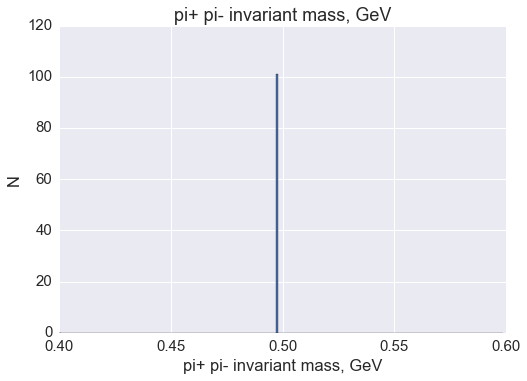

In [12]:
## Simply using m=sqrt(E^2-p^2)
sns.set(font_scale=1.5)
import week09_particledetectorObject as ParticleDetectorClassDefinition
import week09_histogramObject as HistogramCLassDefinition
detector = ParticleDetectorClassDefinition.ParticleDetector()     

number_of_kaons_total = 1000
c=3*10**8
m=[]
for i in range(0, number_of_kaons_total):
    detector.generate_one_kaon_decay()
    
    if detector.trigger_is_satisfied:
        
        m.append(np.sqrt( (detector.e_piplus+detector.e_piminus)**2\
         - la.norm(detector.p_piplus+detector.p_piminus)**2 ) )  
pt.hist(m,bins=np.arange(0.4,0.6,0.001))
pt.xlabel('pi+ pi- invariant mass, GeV')
pt.title('pi+ pi- invariant mass, GeV')
pt.ylabel('N')
print('M = '+str(np.mean(m)*1000)+' MeV')
pt.show()

<font size=5>Problem 2<font>


Now instantiating the particle physics experiment.


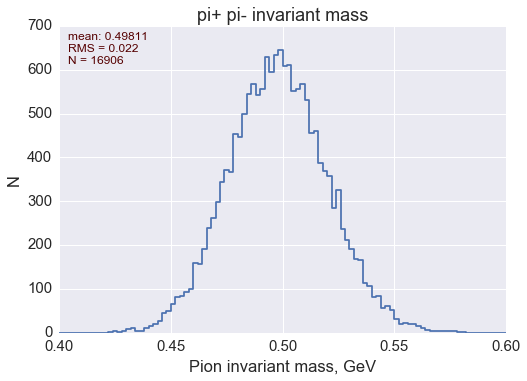

In [13]:
### Adding variations to positions of chamber and energy. Calculating 3-momentum of 
# pion using p=sqrt(E^2-m^2), then plug in to calculate final m. 
# The component of p of pion along z axis is used by multiplying z/|z|. 

import week09_particledetectorObject as ParticleDetectorClassDefinition
import week09_histogramObject as HistogramCLassDefinition

detector = ParticleDetectorClassDefinition.ParticleDetector()
detector.z_target_to_chamber_1 = 35.
histo1 = HistogramCLassDefinition.histo("pi+ pi- invariant mass", 100, 0.4, 0.6)
histo1.hsetlabels("Pion invariant mass, GeV", "N")

number_of_kaons_total = 100000

m=[]
for i in range(0, number_of_kaons_total):
    detector.generate_one_kaon_decay()
## apply variations
    detector.x_hits_chamber_1_recon = detector.x_hits_chamber_1 + \
    np.random.normal(0., 0.2e-3)
    detector.y_hits_chamber_1_recon = detector.y_hits_chamber_1 + \
    np.random.normal(0., 0.2e-3)
    detector.x_hits_chamber_2_recon = detector.x_hits_chamber_2 + \
    np.random.normal(0., 0.2e-3)
    detector.y_hits_chamber_2_recon = detector.y_hits_chamber_2 + \
    np.random.normal(0., 0.2e-3)
    detector.e_piplus_recon=detector.e_piplus + np.random.normal(0.,\
                         0.5*np.sqrt(detector.e_piplus))
    detector.e_piminus_recon=detector.e_piminus + np.random.normal(0.,\
                       0.5*np.sqrt(detector.e_piminus))
## triggered
    if detector.trigger_is_satisfied:

        M=(np.sqrt( (detector.e_piminus_recon+detector.e_piplus_recon)**2\
         - (np.sqrt(detector.e_piminus_recon**2-0.13957**2)*\
    (detector.p_piminus_recon[2]/la.norm(detector.p_piminus_recon))\
+np.sqrt(detector.e_piplus_recon**2-0.13957**2)*(detector.p_piplus_recon[2]\
     /la.norm(detector.p_piplus_recon))  )**2 ) ) 
        
        histo1.hfill(M)
histo1.hprint()

<font size=4> Time Spent: Problem 1: 1 hr. Problem 2: 5 hrs. Collaboration: Completed on my own. Reference: None.<font>

In [5]:
t=np.arange(8.954*10**(-11),5.1*10**(-8),5*10**(-10))
len(t)

102